In [1]:
                # !pip install matplotlib
                # !pip install seaborn

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

In [23]:
%cd ../../data/weather
!ls

/usr/local/bin/notebooks/data/weather
DS_sensor_weather.csv


In [82]:
filename = 'DS_sensor_weather.csv'
df_read = pd.read_csv(filename,
#                        encoding='utf-8',
#                        sep=',',
                       index_col = 10,
#                        header=0
                       )
print(df_read.shape)
df_read.columns
df_read.isnull().sum(axis = 0)
df_read.head(1)

(1095, 10)


,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm
row_number,,,,,,,,,,
0,919.06,23.79,281.1,3.080354,275.4,3.863283,0.89,4.0,43.42,37.16


In [72]:
# df.info()

In [83]:
df = df_read.copy()
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum(axis = 0)

(1064, 10)


air_pressure            0
air_temperature         0
avg_wind_direction      0
avg_wind_speed          0
max_wind_direction      0
max_wind_speed          0
rain_accumulation       0
rain_duration           0
relative_humidity       0
relative_humidity_pm    0
dtype: int64

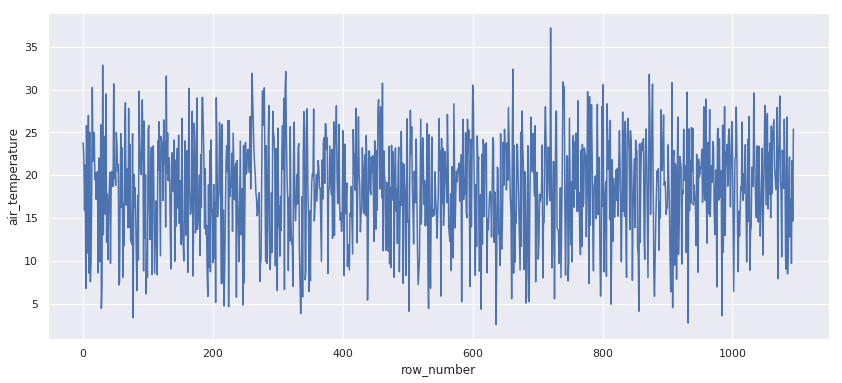

In [88]:
f, ax = plt.subplots(1, 1, figsize=(14,6))
plot = sns.lineplot(x=df.index, y=df.air_temperature, data=df, ax=ax)

In [89]:
df.air_temperature.describe()

count    1064.000000
mean       18.345894
std         6.204463
min         2.640000
25%        14.110000
50%        18.765822
75%        23.072707
max        37.170000
Name: air_temperature, dtype: float64

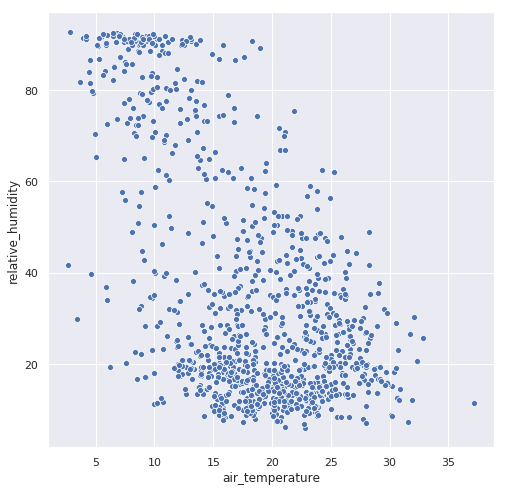

In [90]:
f, ax = plt.subplots(1, 1, figsize=(8,8))

plot = (sns.scatterplot(x=df.air_temperature, y=df.relative_humidity, data=df, ax = ax)
        .set_title('',fontsize=18))

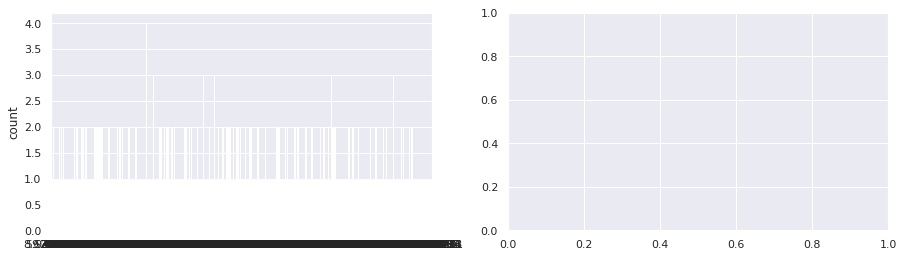

In [91]:
# f, axes = plt.subplots(1, 2, figsize=(15,4))

# df = df_read.dropna().copy()
# sns.countplot(x=df.air_temperature.values, data=df, ax=axes[0], color='lightblue')

# df = df_read.dropna().copy()
# sns.countplot(x='minimum_nights', data=df[df.minimum_nights>10], ax=axes[1], color='lightblue')

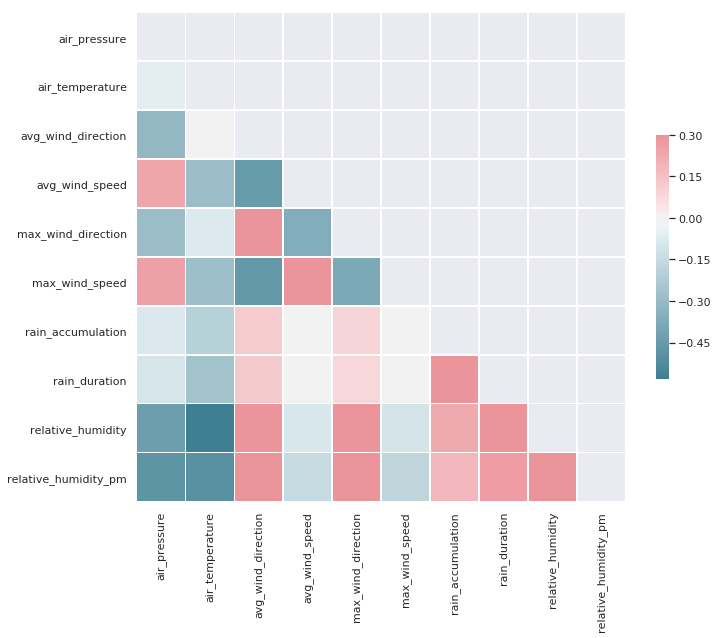

In [94]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})